## Álvaro Sánchez de la Cruz, Marc Gil Arnau
# Tarea 1
# Ánalisis Exploratorio y Redes Neuronales Artificiales

Índice (pendiente por hacer, a medida que vayamos haciendo cosas las vamos metiendo)

## Sección I. Análisis descriptivo y exploratorio de la base de datos. Preprocesamiento

## 1.- Cargar y leer la base datos

In [1]:
# Módulos de manipulación de datos y visualización
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt

# Módulos Estadísticos
import scipy
from scipy import stats as ss

# Módulos de Preprocesamiento y Codificación
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# Módulos de Modelado, Selección y Evaluación
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier

# Módulos de Métricas y Evaluación
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    roc_auc_score
)

In [2]:
# Leermos y guardamos el fichero en un dataframe.
comercio_df = pd.read_csv("Dataset.csv")

comercio_df = comercio_df.drop("ID", axis='columns')

## 2.- Descripción del conjunto "E-Commerce Shipping"

Contexto: Una compañía internacional basada en vender productos electrónicos a través de internet quiere estudiar el comportamiento de sus clientes en base a ciertos datos de ventas. El objetivo es ver si el envío ha llegado a tiempo o no. Se trata de una tarea de clasificación.

Variables:

Warehouse Block: La compañía tiene 5 grandes almacenes (A, B, C, D, E). Categórica nominal.

Mode of shipment: La comapñía tiene 3 formas de entregar los productos (Ship, Flight, Road). Categórica nominal.

Customer care calls: Número de llamadas que hace el cliente a la compañía para preguntar sobre el estado del envío. Numérica discreta. Rango: [ 2 , 7 ].

Customer rating: Calificación del cliente sobre la compañía. 1 es lo peor, 5 es lo mejor. Numérica discreta ordinal.

Cost of the products: Precio del producto en dólares americanos. Numérica continua. Rango: [ 96 , 310 ].

Prior purchases: Número de compras realizadas por el cliente previamente. Numérica discreta. Rango: [ 2 , 10 ].

Product importance: La compañía ha caracterizado la importancia de cada producto (low, medium, high). Categórica ordinal.

Gender: Género del cliente (Male, Female). Categórica nominal.

Discount offered: Descuento ofrecido en el producto en porcentaje. Numérica continua. Rango: [ 1 , 65 ]

Weight in gms: Peso del producto en gramos. Numérica continua. Rango: [ 1001 , 7846 ].

Reached on time: Es la variable objetivo, 1 indica que el producto NO ha llegado a tiempo y 0 que sí lo ha hecho. Categórica nominal.


In [3]:
# Tipo de las variables (numérica, categórica, etc...)
comercio_df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [4]:
# Nombres de las variables
comercio_df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## 3.- Análisis descriptivo

In [5]:
# Vistazo rápido a los estadísticos de las variables
comercio_df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
# Tamaño de la base de datos (número de observaciones, número de muestras)
comercio_df.shape

(10999, 11)

In [7]:
# Número de valores únicos por variable
comercio_df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

Viendo los resultados de .describe() y estos, podemos ver que no hay clientes que hayan llamado 0 ó 1 veces para informarse sobre su pedido así como también que los clientes estudiados tienen como mínimo 2 compras previas. Lo mismo a la compañía sólo le interesa el estudio de sus clientes "fieles".

In [8]:
# ¿Existen valores faltantes?
comercio_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

A priori no hay valores faltantes aunque puede que estemos ante el caso de que los valores faltantes hayan sido sustituidos por 0.

In [9]:
# ¿Está balanceada la variable objetivo?
comercio_df["Reached.on.Time_Y.N"].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

La categorías no están perfectamente equilibradas pero tampoco podemos considerar un grave desbalanceo.

## 4.-Visualización

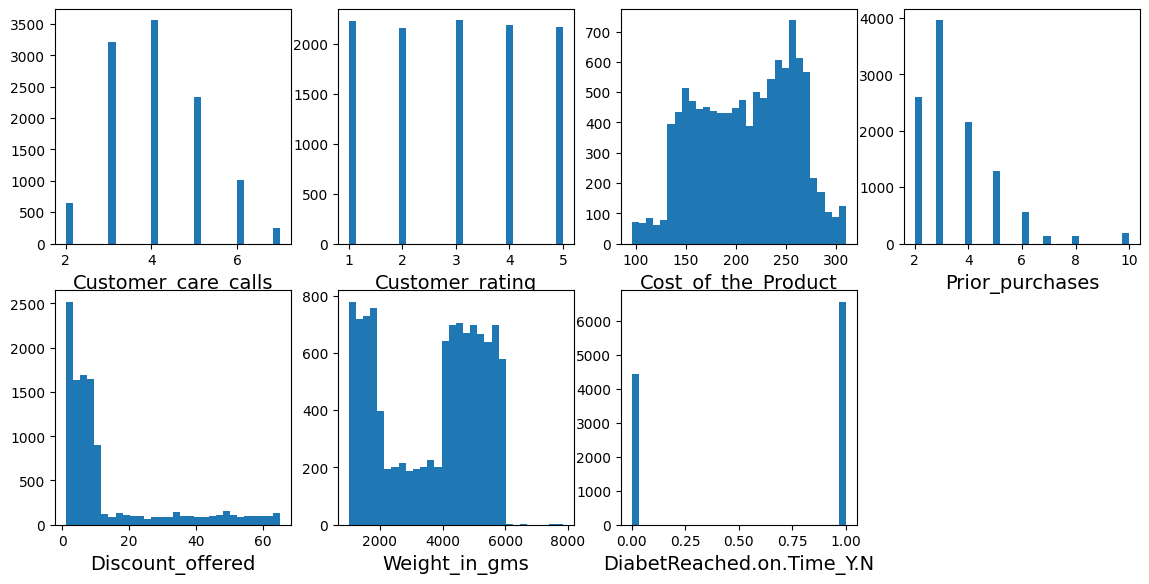

In [10]:
plt.figure(figsize=(14,14))

plt.subplot(4,4,1)
plt.hist(comercio_df["Customer_care_calls"],bins=30)
plt.xlabel('Customer_care_calls',fontsize=14)

plt.subplot(4,4,2)
plt.hist(comercio_df["Customer_rating"],bins=30)
plt.xlabel('Customer_rating',fontsize=14)

plt.subplot(4,4,3)
plt.hist(comercio_df["Cost_of_the_Product"],bins=30)
plt.xlabel('Cost_of_the_Product',fontsize=14)

plt.subplot(4,4,4)
plt.hist(comercio_df["Prior_purchases"],bins=30)
plt.xlabel('Prior_purchases',fontsize=14)

plt.subplot(4,4,5)
plt.hist(comercio_df["Discount_offered"],bins=30)
plt.xlabel('Discount_offered',fontsize=14)

plt.subplot(4,4,6)
plt.hist(comercio_df["Weight_in_gms"],bins=30)
plt.xlabel('Weight_in_gms',fontsize=14)

plt.subplot(4,4,7)
plt.hist(comercio_df["Reached.on.Time_Y.N"],bins=30)
plt.xlabel('DiabetReached.on.Time_Y.N',fontsize=14)



plt.show()

Destacamos el gráfico del peso, vamos a considerar que productos superiores a 6 Kg son productos atípicos.

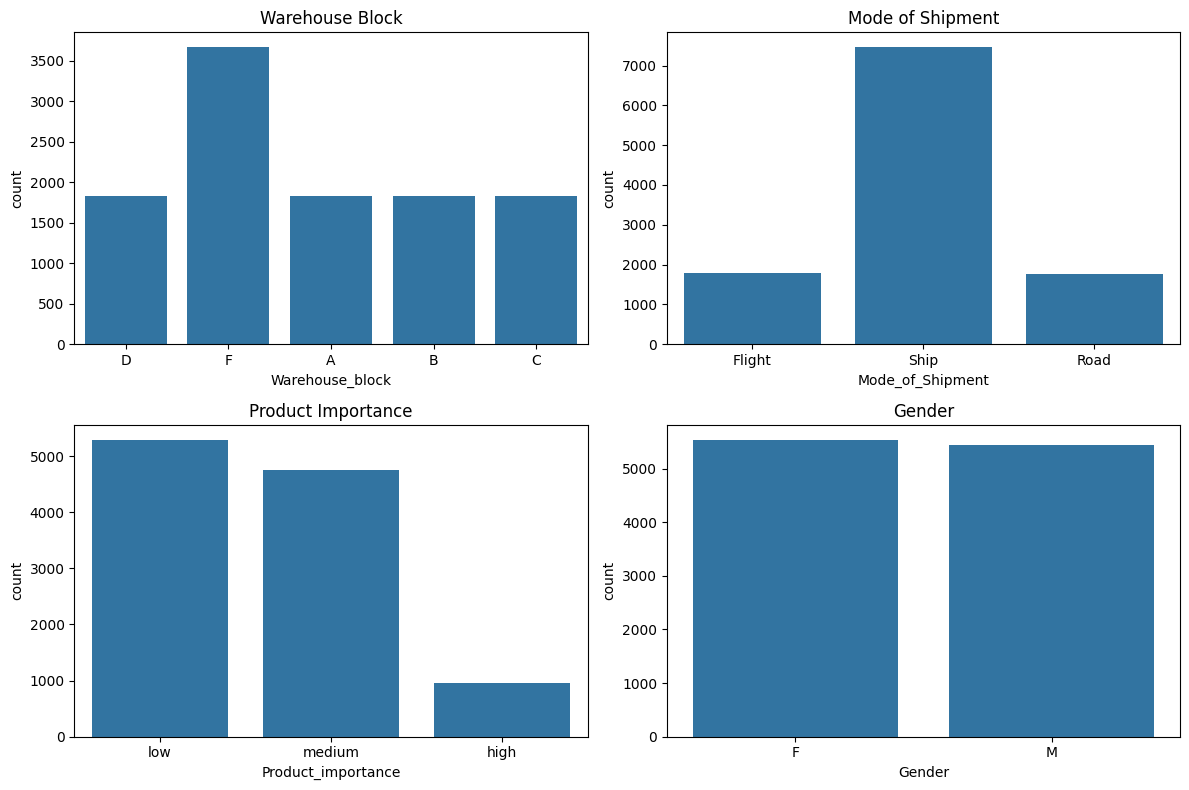

In [11]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas

sns.countplot(x="Warehouse_block", data=comercio_df, ax=axs[0, 0])
axs[0, 0].set_title("Warehouse Block")

sns.countplot(x="Mode_of_Shipment", data=comercio_df, ax=axs[0, 1])
axs[0, 1].set_title("Mode of Shipment")

sns.countplot(x="Product_importance", data=comercio_df, ax=axs[1, 0])
axs[1, 0].set_title("Product Importance")

sns.countplot(x="Gender", data=comercio_df, ax=axs[1, 1])
axs[1, 1].set_title("Gender")

plt.tight_layout()
plt.show()







Resalta el gráfico de los almacenes ya que todos aparentemente tienen la misma frecuencia excepto el almacén "F", que todos tengan la misma frecuencia podría deberse a que quien haya hecho la recogida de muestras ha querido coger el mismo número de clientes por almacén, es decir si cada almacén representase un continente, han escogido el mismo número de clientes por continente. Por otro lado, suponemos que "F" tiene el doble de clientes porque han juntado dos almacenes en uno.

A parte, nos resulta curioso estudiar qué pasa con la importancia del producto si separamos las muestras entre mujeres y hombres. Ya que si encontrasemos una gran diferencia estudiando las muestras dividas en comparación a juntándolas, crearíamos 2 modelos de clasificación diferenciados por género. 

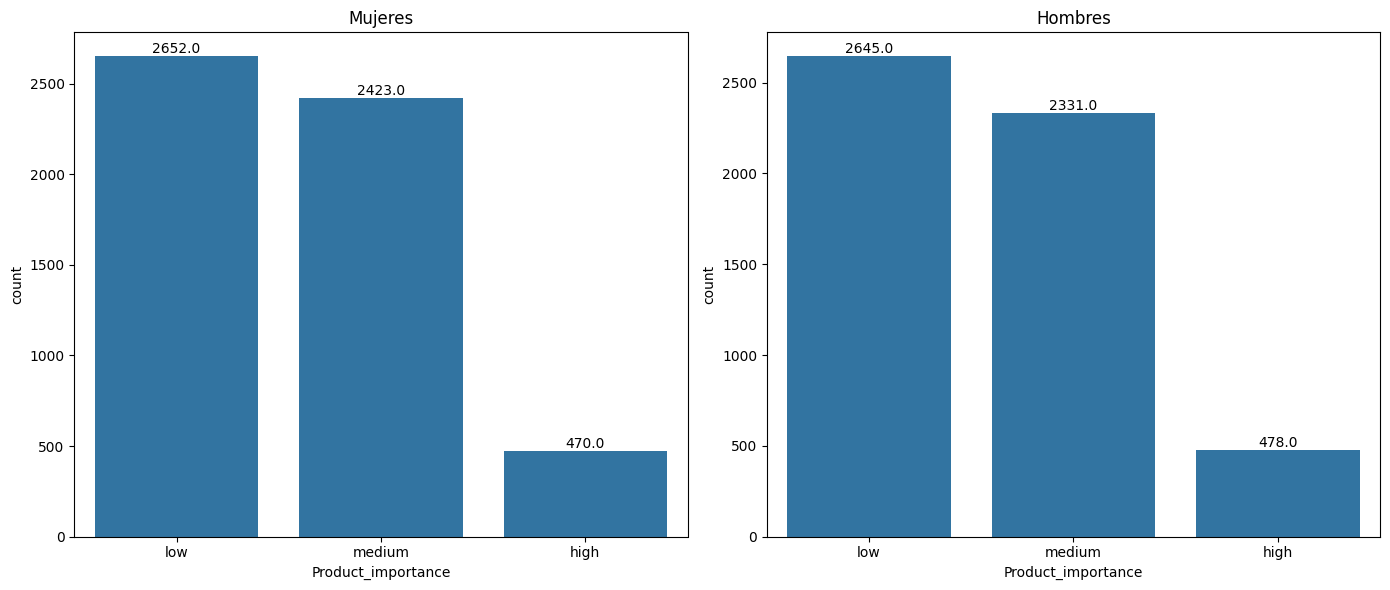

In [12]:
# Crear figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Filtrar por género
mujeres = comercio_df[comercio_df['Gender'] == 'F']
hombres = comercio_df[comercio_df['Gender'] == 'M']

# Countplot para mujeres
sns.countplot(x="Product_importance", data=mujeres, ax=axs[0])
axs[0].set_title("Mujeres")

# Añadir valores encima de cada barra
for p in axs[0].patches:
    axs[0].annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Countplot para hombres
sns.countplot(x="Product_importance", data=hombres, ax=axs[1])
axs[1].set_title("Hombres")

# Añadir valores encima de cada barra
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Ajustar espacios
plt.tight_layout()
plt.show()


Comparando los resultados, son casi iguales, no dividiremos el conjunto en 2, y crearemos un solo modelo.

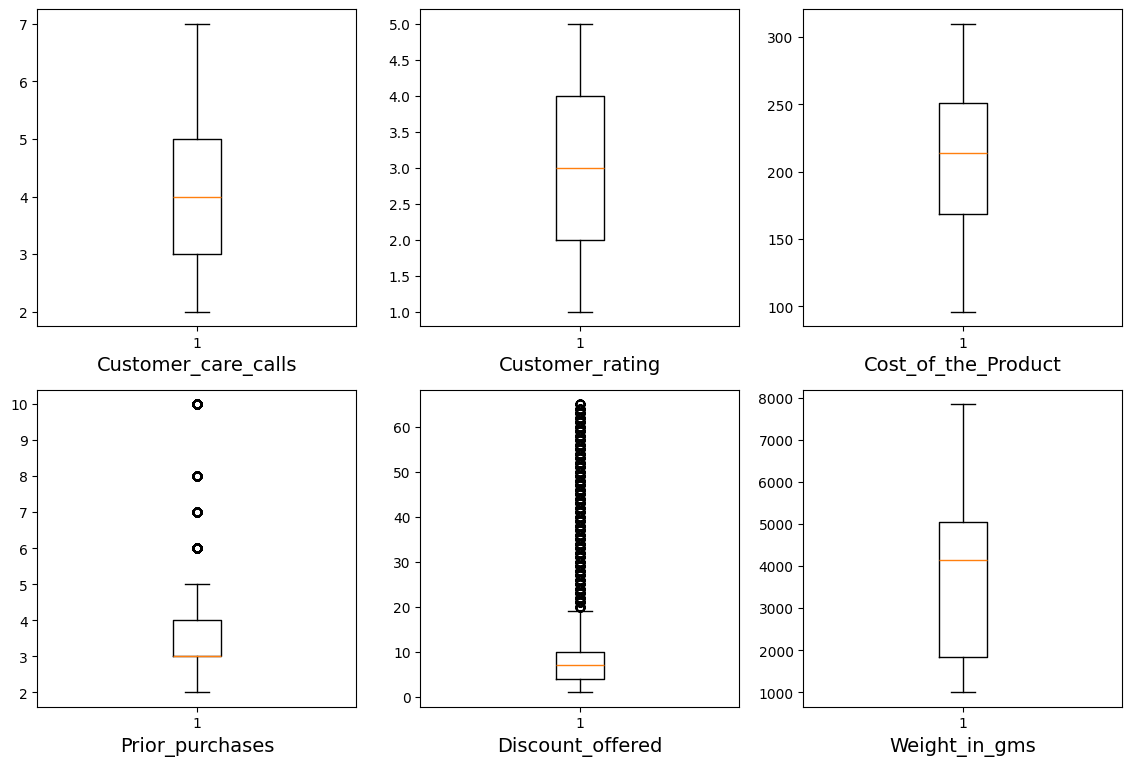

In [13]:
numericas = comercio_df.drop("Reached.on.Time_Y.N", axis='columns')
# Crear un boxplot por cada variable
plt.figure(figsize=(14,14))

plt.subplot(3,3,1)
plt.boxplot(numericas["Customer_care_calls"])
plt.xlabel('Customer_care_calls',fontsize=14)

plt.subplot(3,3,2)
plt.boxplot(numericas["Customer_rating"])
plt.xlabel('Customer_rating',fontsize=14)

plt.subplot(3,3,3)
plt.boxplot(numericas["Cost_of_the_Product"])
plt.xlabel('Cost_of_the_Product',fontsize=14)

plt.subplot(3,3,4)
plt.boxplot(numericas["Prior_purchases"])
plt.xlabel('Prior_purchases',fontsize=14)

plt.subplot(3,3,5)
plt.boxplot(numericas["Discount_offered"])
plt.xlabel('Discount_offered',fontsize=14)

plt.subplot(3,3,6)
plt.boxplot(numericas["Weight_in_gms"])
plt.xlabel('Weight_in_gms',fontsize=14)

plt.show()

Mirando el boxplot de las compras anteriores de los clientes ("Prior purchases") podríamos considerar que los clientes con 6 o más pedidos previos son o bien clientes fieles, o bien compradores compulsivos, este último caso sucedería si las muestras han sido recogidas en un corto espacio de tiempo.

Por otro lado, se observa que los descuentos por encima del 20% son bastante escasos en comparación al resto. Pese a ser valores menos comunes, no los vamos a considerar atípicos.

## 5.- Correlación
(hay que estudiar las correlaciones segun el tipo de variable, relacion numerica-numerica categorica-categorica ordinal-ordinal y todas las combinaciones posibles entre estas)

### Correlación entre variables categóricas

Vamos a usar la V de Cramer, que es una medida estadística que cuantifica la fuerza de la asociación entre dos variables nominales o categóricas, con valores que van de 0 (sin asociación) a 1 (asociación perfecta).

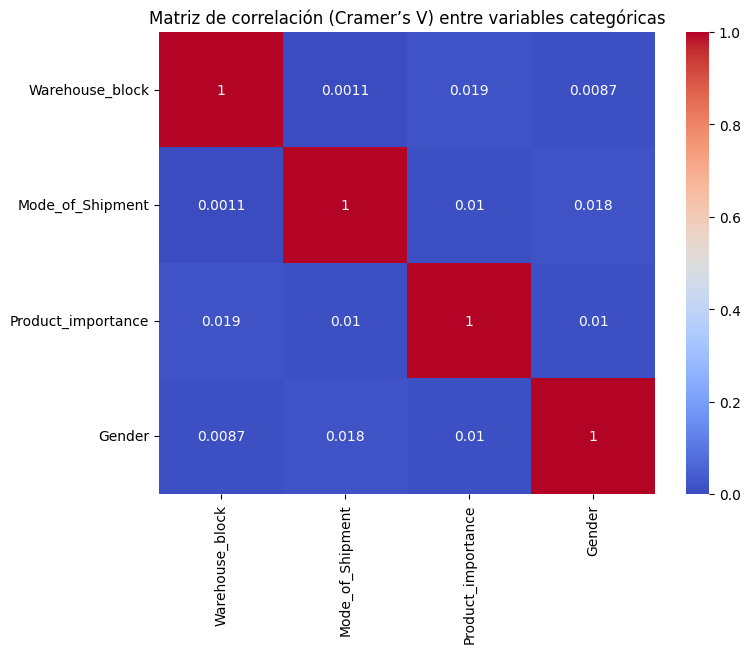

In [14]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Seleccionar variables categóricas
cat_cols = comercio_df.select_dtypes(include='object').columns

# Calcular matriz de Cramer’s V
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(comercio_df[col1], comercio_df[col2])

cramers_results = cramers_results.astype(float)

# Visualizar matriz de correlaciones categóricas
plt.figure(figsize=(8,6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de correlación (Cramer’s V) entre variables categóricas")
plt.show()



Mirando los resultados del gráfico, las variables categóricas están casi incorreledas entre si.

### Correlación entre variables numéricas

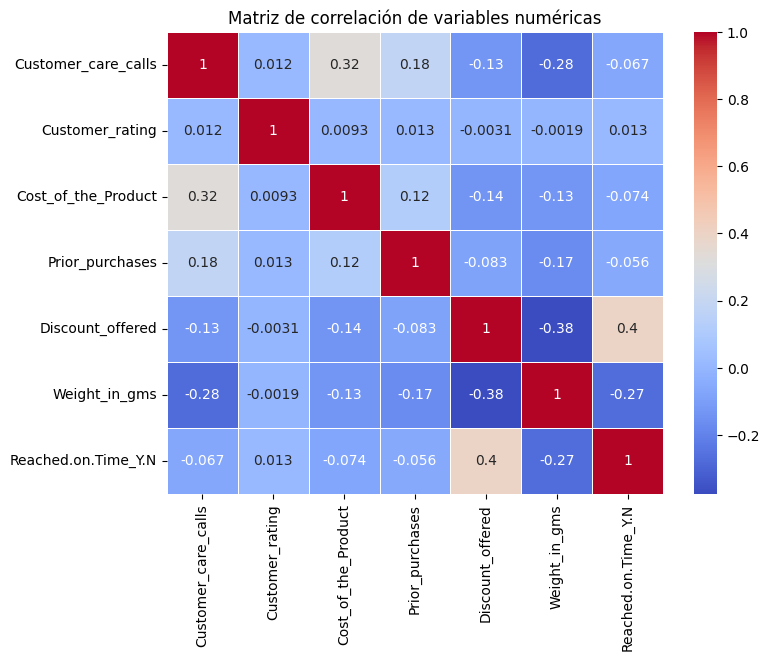

In [15]:
numericas = comercio_df.select_dtypes(include=['int64', 'float64'])
corr = numericas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

Destacamos: 

  - Cuanto más cuesta el producto, más se preocupa el cliente por él, haciendo más llamadas para saber su estado.
  - La calificación del cliente no aporta nada de información, por lo menos al resto de variables numéricas, veremos si al estudiar luego las relaciones numéricas-categóricas cambia algo.
  - Los productos más pesados tienen menos descuento.
  - En relación con la variable objetivo, a mayor descuento, mayor es la probabilidad de que el pedido llegue a tiempo. Así mismo, los pedidos que pesan más, suelen entregarse tarde.
     

### Correlación entre variables numéricas y categóricas

Para este tipo de relaciones vamos a utilizar eta cuadrado (η²), una medida que cuantifica cuánta proporción de la variabilidad de la variable numérica puede explicarse por las diferencias entre las categorías definidas por la variable categórica.

In [16]:
def eta_squared(data, cat, num):
    groups = [data[num][data[cat] == c] for c in data[cat].unique()]
    
    y = data[num]
    grand_mean = y.mean()
    
    ss_between = sum([len(g) * (g.mean() - grand_mean)**2 for g in groups])
    ss_total = sum((y - grand_mean)**2)
    
    return ss_between / ss_total

# Identificar variables numéricas y categóricas
numericas = comercio_df.select_dtypes(include=['number']).columns
categoricas = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Crear tabla vacía
tabla_eta = pd.DataFrame(index=categoricas, columns=numericas)

# Rellenar tabla con η²
for cat in categoricas:
    for num in numericas:
        tabla_eta.loc[cat, num] = eta_squared(comercio_df, cat, num)

tabla_eta


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,0.000306,0.00017,0.000714,0.000163,0.000197,0.000033,0.000099
Mode_of_Shipment,0.000415,0.000007,0.000067,0.000016,0.000115,0.000017,0.000068
Product_importance,0.003566,0.000023,0.002341,0.000746,0.000769,0.00879,0.00111
Gender,0.000006,0.000008,0.00039,0.000088,0.000139,0.000013,0.000022


Interpretando los resultados, asumimos que las variables numéricas están prácticamente incorreladas con las categóricas

### One-Hot Encoding

En nuestro dataset hay algunas variables categóricas (gender, warehouse block, mode of shiphment y product importance). Para poder usarlas en los modelos que utilizaremos, necesitamos transformarlas a numérico.

En el caso de Gender, al ser una variable con solo dos categorías podemos convertirla en una variable binaria sin necesidad de usar del One-Hot Encoding.

In [17]:
comercio_copia = comercio_df.copy()

In [18]:
mapear_gender = {"M": 1, "F": 0}
comercio_copia["Gender"] = comercio_copia["Gender"].map(mapear_gender).astype("Int64")

Para las tres variables restantes aplicaremos One-Hot Encoding para convertirlas a formato numérico. En el caso de Warehouse_block y Mode_of_Shipment lo haremos mediante target encoding y en Product_importance lo haremos con label encoding.

In [19]:
# Definir el orden ordinal
orden_importancia = {"low": 0, "medium": 1, "high": 2}
comercio_copia["Product_importance_Encoded"] = comercio_copia["Product_importance"].map(orden_importancia).astype("Int64")
# Eliminar la columna original
comercio_copia = comercio_copia.drop(columns=["Product_importance"])

Antes de hacer el target encoding es necesario realizar la partición en diseño y test para que el encoding aprenda solo los datos de entreanmiento. Por lo que vamos a dividir de forma estratificada el dataset en proporciones del 70% para diseño y 30% para test.

In [20]:
# Dividimos las variables en variable dependiente o variable independiente
X = comercio_copia.drop("Reached.on.Time_Y.N", axis = 1)
y = comercio_copia["Reached.on.Time_Y.N"]

In [21]:
# Separamos el conjunto de diseño (X_train, y_train) y de test (X_test, y_test) de forma estratificada: particiones 70/30
X_diseno, X_test, y_diseno, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
print(X_diseno.shape)
print(y_diseno.shape)
print(X_test.shape)
print(y_test.shape)

(7699, 10)
(7699,)
(3300, 10)
(3300,)


Vamos a aplicar el target encoding a  Warehouse_block y Mode_of_Shipment

In [22]:
# Aplicamos el Target Encoding
columnas_target_encode = ["Warehouse_block", "Mode_of_Shipment"]
encoder = ce.TargetEncoder(cols=columnas_target_encode, smoothing=0.2) # Añadimos smoothing por buena práctica
encoder.fit(X_diseno, y_diseno)
X_diseno_encoded = encoder.transform(X_diseno)
X_test_encoded = encoder.transform(X_test)

In [23]:
X_diseno_encoded.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Product_importance_Encoded
5014,0.588976,0.597257,6,2,254,4,1,4,1392,0
8288,0.599216,0.597257,5,4,145,3,1,2,4492,0
7487,0.602308,0.597257,5,1,242,5,1,8,1382,1
9362,0.599216,0.597257,6,1,264,4,1,9,1243,0
1022,0.599216,0.597257,3,4,260,3,0,21,2003,0


Podemos ver como hemos cambiado las variables categóricas a numéricas, Gender, al ser binaria, la mapeamos a 1 y 0, Product_importance (que tiene un orden) la codificamos con Label Encoding para asignar valores (0, 1, 2) que respetan su jerarquía y por último, Warehouse_block y Mode_of_Shipment usamos Target Encoding, donde reemplazamos sus categorías con la media de la variable objetivo (Reached.on.Time_Y.N) que corresponde a cada categoria de la variable original observada en los datos de diseño.

### Normalización de variables

En el EDA hemos visto que las variables tenian valores dispares, esto puede afectar a los resultados de los modelos. Para solucionarlo vamos a escalar las variables para que tengan media 0 y desviación 1.

In [24]:
# Escogemos las columnas númericas
num_col = X_diseno.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Creamos y ajustamos el scaler
scaler = StandardScaler()
scaler.fit(X_diseno[num_col])

# Transformamos y asginamos los nuevos valores
X_diseno[num_col] = scaler.transform(X_diseno[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

X_diseno.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Product_importance_Encoded
count,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03,7.699000e+03
mean,-2.099603e-17,-6.644899e-17,-1.753515e-17,-1.218231e-16,6.967915e-17,4.983674e-17,8.952156e-17,8.582994e-17
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-1.814828e+00,-1.410971e+00,-2.363375e+00,-1.029378e+00,-1.000650e+00,-7.619641e-01,-1.609112e+00,-9.398831e-01
25%,-9.353995e-01,-7.027717e-01,-8.517220e-01,-3.746206e-01,-1.000650e+00,-5.753987e-01,-1.099793e+00,-9.398831e-01
50%,-5.597091e-02,5.427164e-03,8.011916e-02,-3.746206e-01,9.993508e-01,-3.888333e-01,3.168816e-01,6.196341e-01
75%,8.234577e-01,7.136260e-01,8.462997e-01,2.801363e-01,9.993508e-01,-2.022680e-01,8.674712e-01,6.196341e-01
max,2.582315e+00,1.421825e+00,2.068047e+00,4.208678e+00,9.993508e-01,3.218097e+00,2.304018e+00,2.179151e+00


Una vez aplicada la estandarización la tabla confirma que las variables han sido transformadas, ya que la media es prácticamente 0 y la desviación estándar es prácticamente 1.

## Sección II. Esquema lineal y selección de características

En esta sección entrenaremos un modelo de regresión logística para predecir si un envío llega a tiempo o no.

Comenzaremos ajustando una regresión logística básica sin regularización.

In [25]:
# Creamos el modelo y lo entrenamos con el conjunto de diseño
log_reg_no_reg = LogisticRegression(random_state = 0, max_iter = 1000, penalty=None)
log_reg_no_reg.fit(X_diseno_encoded, y_diseno)
# Hacemos predicciones sobre test
y_pred_no_reg = log_reg_no_reg.predict(X_test_encoded)

print(classification_report(y_test, y_pred_no_reg))
cm = confusion_matrix(y_test, y_pred_no_reg)
cm_df = pd.DataFrame(cm, index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],    columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])
cm_df

              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1331
           1       0.71      0.68      0.70      1969

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.64      0.64      3300



,Pred 0 (Llegó a tiempo),Pred 1 (No llegó a tiempo)
Real 0 (Llegó a tiempo),775,556
Real 1 (No llegó a tiempo),623,1346


La regresión logística básica tiene un rendimiento moderado, con un accuracy del 65%. El modelo distingue bastante bien los envíos que no llegan a tiempo (clase 1) con un recall de casi el 70%, pero tiene limitaciones a la hora de identificar entregas que han llegado a tiempo con un recall del 59%.  

Los resultados son los esperados para un modelo sin regularización o selección de características, pero nos servirá para comparar con modelos más complejos.

In [27]:
# Encontramos los coeficientes más importantes para el modelo
coef = log_reg_no_reg.coef_[0]
feature_names = X_diseno_encoded.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coeficiente': coef,
    'AbsCoef': np.abs(coef)
})

coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)
print("\nCoeficientes ordenados por importancia:\n")
coef_df


Coeficientes ordenados por importancia:



,Feature,Coeficiente,AbsCoef
1,Mode_of_Shipment,0.476174,0.476174
0,Warehouse_block,0.474436,0.474436
2,Customer_care_calls,-0.113126,0.113126
7,Discount_offered,0.110142,0.110142
9,Product_importance_Encoded,0.095489,0.095489
5,Prior_purchases,-0.090460,0.090460
6,Gender,0.060847,0.060847
3,Customer_rating,0.044094,0.044094
4,Cost_of_the_Product,-0.002176,0.002176
8,Weight_in_gms,-0.000241,0.000241


Si observamos los coeficientes, el que mayor impacto tiene en el retraso de un envio (clase 1) es el descuento que tiene un coeficiente muy superior al resto de características. Las variables que reducen el riesgo a un retraso del envío son el peso, las compras previas o si la importancia del producto es baja. Se puede ver casi todas las variables favorecen que el envío no se haga con retraso. 
También se puede comentar que el tipo de envío o el almacen donde se guarda el producto no tienen un papael importante en la explciación de retrasos

## Regresión logística con regularización

La regresión logística básica no incluye regularización, lo que puede provocar que los coeficientes sean inestables, que estemos sobreajustando o que haya poca capacidad de generalización.

Para mejorar el modelo y controlar la complejidad de este entrenaremos modelos regularizados. La regularización que vamos es realizar es la l2 (Ridge) ya que está penaliza la magnitud de los coeficientes sin anularlos, lo que "crea" modelos más estable y con mejor generalización.
Además, aunque nuestro dataset haya pasado de 11 a 18 variables despues del one-hot encoding este número de variables sigue siendo bajo y todas la columnas pueden representar información relevante, por lo que la l1 (Lasso) que elimina coeficientes o les da valor de 0 no creemos que sea la mejor opción.

Por lo que hemos decido usar la l2 (Ridge), y para seleccionar los hiperparámetros usaremos validación cruzada.

 ### Validación Cruzada 

In [28]:
# Parámetros a buscar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Definir modelo L1
logreg_cv_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, random_state=42)

# Inicializar GridSearchCV
# Optimizamos F1-Score sobre 5 pliegues del conjunto de diseño.
grid_search_l1 = GridSearchCV(
    estimator=logreg_cv_l1,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=0
)

# Ejecutar la búsqueda en el conjunto de diseño codificado y escalado
grid_search_l1.fit(X_diseno_encoded, y_diseno)

# Obtener el mejor C
best_l1 = grid_search_l1.best_estimator_
best_C_l1 = grid_search_l1.best_params_['C']

print(f"Mejor hiperparámetro C encontrado (L1): {best_C_l1}")
print(f"Mejor F1-Score promedio de validación cruzada: {grid_search_l1.best_score_:.4f}")

Mejor hiperparámetro C encontrado (L1): 10
Mejor F1-Score promedio de validación cruzada: 0.6933


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score

# 1. Predicción sobre el conjunto de test
y_pred_l1 = best_l1.predict(X_test_encoded)
y_prob_l1 = best_l1.predict_proba(X_test_encoded)[:, 1]

# 2. Obtención de las 4 Figuras de Mérito
metrics_dict_l1 = {
    'Accuracy': accuracy_score(y_test, y_pred_l1),
    'Precision': precision_score(y_test, y_pred_l1, zero_division=0),
    'Recall': recall_score(y_test, y_pred_l1, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_l1, zero_division=0),
    'AUC': roc_auc_score(y_test, y_prob_l1)
}
metrics_df_l1 = pd.DataFrame.from_dict(metrics_dict_l1, orient='index', columns=['Valor']).round(4)

print("\n### Evaluación en Test (Regresión Logística con Regularización L1) ###")
print(metrics_df_l1)

# 3. Matriz de Confusión
cm_l1 = confusion_matrix(y_test, y_pred_l1)
cm_df_l1 = pd.DataFrame(cm_l1, 
                     index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],
                     columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])
print("\nMatriz de Confusión (L1):")
print(cm_df_l1)

# 4. Coeficientes para Selección de Características
coef_l1 = best_l1.coef_[0]
features_l1 = X_diseno_encoded.columns
coef_df_l1 = pd.DataFrame({
    'Característica': features_l1, 
    'Coeficiente': coef_l1, 
    'AbsCoef': np.abs(coef_l1)
}).sort_values(by='AbsCoef', ascending=False)

print("\n### Coeficientes L1 Ordenados por Importancia (Características Relevantes) ###")
print(coef_df_l1)


### Evaluación en Test (Regresión Logística con Regularización L1) ###
            Valor
Accuracy   0.6418
Precision  0.7072
Recall     0.6821
F1-Score   0.6944
AUC        0.7249

Matriz de Confusión (L1):
                            Pred 0 (Llegó a tiempo)  \
Real 0 (Llegó a tiempo)                         775   
Real 1 (No llegó a tiempo)                      626   

                            Pred 1 (No llegó a tiempo)  
Real 0 (Llegó a tiempo)                            556  
Real 1 (No llegó a tiempo)                        1343  

### Coeficientes L1 Ordenados por Importancia (Características Relevantes) ###
               Característica  Coeficiente   AbsCoef
0             Warehouse_block     0.932401  0.932401
1            Mode_of_Shipment     0.614118  0.614118
2         Customer_care_calls    -0.112360  0.112360
7            Discount_offered     0.110322  0.110322
9  Product_importance_Encoded     0.096244  0.096244
5             Prior_purchases    -0.089743  0.089743
6    

El modelo con regularización L2 obtuvo como mejor hiperparámetro C = 0.001, lo que implica una regularización fuerte. Este modelo presenta un comportamiento caracterizado por una elevada capacidad para detectar retrasos (recall de la clase 1 = 0.809), aunque a costa de un menor rendimiento global (accuracy = 0.629) y una pérdida notable de precisión en la clase 0.

Los coeficientes del modelo se reducen de forma sustancial respecto a la regresión logística sin regularización, manteniendo su signo y jerarquía. Esto confirma que la regularización L2 actúa estabilizando el modelo sin eliminar variables. Las variables más influyentes siguen siendo “Discount_offered” y “Weight_in_gms”, coherentes con el análisis previo.

En conjunto, L2 mejora la capacidad para identificar retrasos (clase de mayor interés en entornos logísticos) y genera un modelo más robusto, aunque sacrifica precisión en las entregas a tiempo. Para este proyecto, y dado el equilibrio entre interpretabilidad y estabilidad, la regularización L2 se considera la opción más adecuada.

### Selección de características

Para identificar qué variables aportan realmente información al modelo, aplicamos 
selección de características mediante RFE (Recursive Feature Elimination) usando 
la regresión logística con regularización L2 como estimador base.

RFE elimina iterativamente las características menos importantes según los 
coeficientes del modelo, permitiendo identificar un subconjunto óptimo de 
predictores que mantenga (o mejore) el rendimiento.

Probamos diferentes números de características para encontrar cuántas son 
realmente necesarias.


In [30]:
 # Solo para la transformación final si fuera necesario

# Modelo base: Usamos la configuración L1 óptima. 
# Si el mejor C fuera 0.1, usas ese valor.
# Usaremos un modelo L1 sin la necesidad de tener un diccionario de resultados anterior.
# Lo ideal es usar el best_l1 ya entrenado de la sección 2.
base_model_wrapper = LogisticRegression(
    penalty='l1', solver='liblinear', max_iter=2000, C=best_C_l1, random_state=42
)

num_features = X_diseno_encoded.shape[1]
resultados_rfe = []

# Probamos un rango de características, por ejemplo, de 4 a todas
print("Iniciando RFE para encontrar el número óptimo de características...")
for k in range(4, num_features + 1):

    # RFE: selecciona k características
    rfe = RFE(estimator=base_model_wrapper, n_features_to_select=k)
    rfe.fit(X_diseno_encoded, y_diseno) # <--- ¡USAMOS X_diseno_encoded!

    # Variables seleccionadas
    mask = rfe.support_
    selected_features = X_diseno_encoded.columns[mask]

    # Entrenamos modelo solo con esas características
    # NOTA: Usamos los mismos hiperparámetros del modelo óptimo L1.
    model = LogisticRegression(
        penalty='l1', solver='liblinear', max_iter=2000, C=best_C_l1, random_state=42
    )
    # Entrenar solo con el subconjunto seleccionado
    model.fit(X_diseno_encoded[selected_features], y_diseno) 

    # Evaluamos en test
    y_pred_rfe = model.predict(X_test_encoded[selected_features])
    acc = accuracy_score(y_test, y_pred_rfe)
    f1 = f1_score(y_test, y_pred_rfe, zero_division=0)

    resultados_rfe.append([k, acc, f1, selected_features])

# Convertimos resultados a DataFrame
rfe_df = pd.DataFrame(resultados_rfe, columns=["Num_features", "Accuracy", "F1", "Features"])
print("\nTabla de Rendimiento RFE:")
display(rfe_df)

# Elegimos el mejor número de características según F1
best_row = rfe_df.iloc[rfe_df["F1"].idxmax()]
print("\nMejor número de características según F1:", best_row["Num_features"])
print("Mejores características seleccionadas:")
print(best_row["Features"])


Iniciando RFE para encontrar el número óptimo de características...

Tabla de Rendimiento RFE:


,Num_features,Accuracy,F1,Features
0,4,0.626667,0.688889,"Index(['Warehouse_block', 'Prior_purchases', '..."
1,5,0.620606,0.683519,"Index(['Warehouse_block', 'Customer_rating', '..."
2,6,0.621212,0.684184,"Index(['Warehouse_block', 'Mode_of_Shipment', ..."
3,7,0.620606,0.684476,"Index(['Warehouse_block', 'Mode_of_Shipment', ..."
4,8,0.620606,0.684317,"Index(['Warehouse_block', 'Mode_of_Shipment', ..."
5,9,0.622121,0.685021,"Index(['Warehouse_block', 'Mode_of_Shipment', ..."
6,10,0.641818,0.694416,"Index(['Warehouse_block', 'Mode_of_Shipment', ..."



Mejor número de características según F1: 10
Mejores características seleccionadas:
Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Gender',
       'Discount_offered', 'Weight_in_gms', 'Product_importance_Encoded'],
      dtype='object')


## Sección 3: MLP

Los modelos lineales entrenados previamente no logran separar adecuadamente las clases, obteniendo acurracys no muy buenos (65%) y un desequilibrio entre las recalls de las clases. Esto indica que la relación de las variables y la variable objetivo no es linealmente separable.

En esta situación, UN MLP de una sola capa permite introducir no linealidad mediante las funciones de activación. Este tipo de red es suficiente para modelar patrones no lineales sin ser excesivamente complejas, evitando posible sobreajuste.

Por tanto, es razonable usar un MLP con una única capa oculta. 

En cuanto a la afirmación “el MLP es un aproximador universal” se refiere al Teorema de Aproximación Universal, que establece que una red neuronal feed-forward con una única capa oculta y un número suficiente de neuronas es capaz de aproximar cualquier función continua con la precisión deseada, siempre que utilice una función de activación no lineal.

Aplicado a nuestro conjunto de observaciones, esto significa que incluso si la relación entre las variables (por ejemplo, descuentos, peso, número de llamadas o importancia del producto) y la probabilidad de retraso es compleja y no lineal, un MLP de una sola capa oculta tiene capacidad teórica para aproximarla. Es decir, aunque el modelo lineal no capture bien ciertos patrones presentes en los datos, un MLP con funciones de activación no lineales sí puede representar dichas relaciones y generar fronteras de decisión más flexibles.

En resumen, el teorema justifica que un MLP con una sola capa oculta es suficiente para abordar este problema, ya que ofrece la capacidad matemática necesaria para modelar las dependencias no lineales detectadas en el análisis previo.

Entrenaremos MLPs con una sola capa oculta probando varios tamaños de capa y distintas funciones de activación.  
Usamos aprendizaje en modo batch completo (cada época procesa todo el conjunto de entrenamiento interno) y **early stopping** monitorizando el **F1 de la clase positiva** en un conjunto de validación (20% de `X_diseno`).  
Elegiremos la arquitectura final según el F1 en validación y comprobaremos su rendimiento en `X_test`.  
Se fijan semillas para reproducibilidad y se documenta la elección de la métrica (F1 para clase positiva porque la clase 1 = retraso es la de interés operativo).


In [31]:
# 1. Definir el modelo base (MLP)
# Utilizamos 'adam' por ser un optimizador robusto y max_iter=500, con early_stopping.
mlp_base = MLPClassifier(
    solver='adam',           
    max_iter=500,            
    random_state=42,
    early_stopping=True,     # Detiene el entrenamiento si la validación deja de mejorar
    # Nota: El solver 'adam' utiliza un esquema de aprendizaje 'mini-batch', 
    # que es una forma eficiente de implementar el aprendizaje 'batch' para optimización.
)

# 2. Definir los hiperparámetros a buscar
# Una capa oculta, probando diferentes tamaños y funciones de activación
param_grid_mlp = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (30,)], # (X,) define una única capa oculta
    'activation': ['tanh', 'relu', 'logistic']          # tanh, ReLU y Sigmoide (logistic)
}

# 3. Inicializar GridSearchCV
# Optimizamos F1-Score sobre 5 pliegues del conjunto de diseño.
grid_search_mlp = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid_mlp,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 4. Ejecutar la búsqueda en el conjunto de diseño estandarizado (con TODAS las variables)
print("Iniciando la búsqueda de la arquitectura MLP de una capa mediante Validación Cruzada...")
grid_search_mlp.fit(X_diseno_encoded, y_diseno)

# 5. Obtener la mejor arquitectura
mejor_mlp = grid_search_mlp.best_estimator_
mejor_params = grid_search_mlp.best_params_

print(f"\nMejor arquitectura de una capa encontrada: {mejor_params}")
print(f"Mejor F1-Score promedio de validación cruzada: {grid_search_mlp.best_score_:.4f}")

Iniciando la búsqueda de la arquitectura MLP de una capa mediante Validación Cruzada...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejor arquitectura de una capa encontrada: {'activation': 'tanh', 'hidden_layer_sizes': (5,)}
Mejor F1-Score promedio de validación cruzada: 0.7474


In [34]:
# 1. Definir el modelo SLP (Single-Layer Perceptron) óptimo
# Usamos los mejores parámetros de la búsqueda en cuadrícula:
mlp_slp_optimo = MLPClassifier(
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    # Parámetros óptimos:
    activation='tanh', 
    hidden_layer_sizes=(5,) 
)

# 2. Entrenar el modelo final en el conjunto de diseño completo
print("Entrenando MLP de una capa (tanh, 5 neuronas) en el set de diseño...")
mlp_slp_optimo.fit(X_diseno_encoded, y_diseno)

# 3. Realizar predicciones sobre el conjunto de test
y_pred_slp = mlp_slp_optimo.predict(X_test_encoded)
y_prob_slp = mlp_slp_optimo.predict_proba(X_test_encoded)[:, 1]

# 4. Evaluación en Test (Obtención de las 4 figuras de mérito)
metrics_dict_slp = {
    'Accuracy': accuracy_score(y_test, y_pred_slp),
    'Precision': precision_score(y_test, y_pred_slp, zero_division=0),
    'Recall': recall_score(y_test, y_pred_slp, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_slp, zero_division=0),
    'AUC': roc_auc_score(y_test, y_prob_slp)
}
metrics_df_slp = pd.DataFrame.from_dict(metrics_dict_slp, orient='index', columns=['Valor']).round(4)

print("\n### Evaluación en Test (MLP de una Capa, SLP) ###")
print(metrics_df_slp)

# 5. Matriz de Confusión
cm_slp = confusion_matrix(y_test, y_pred_slp)
cm_df_slp = pd.DataFrame(cm_slp, 
                     index=['Real 0 (Llegó a tiempo)', 'Real 1 (No llegó a tiempo)'],
                     columns=['Pred 0 (Llegó a tiempo)', 'Pred 1 (No llegó a tiempo)'])
print("\nMatriz de Confusión (SLP):")
print(cm_df_slp)

Entrenando MLP de una capa (tanh, 5 neuronas) en el set de diseño...

### Evaluación en Test (MLP de una Capa, SLP) ###
            Valor
Accuracy   0.5967
Precision  0.5967
Recall     1.0000
F1-Score   0.7474
AUC        0.5000

Matriz de Confusión (SLP):
                            Pred 0 (Llegó a tiempo)  \
Real 0 (Llegó a tiempo)                           0   
Real 1 (No llegó a tiempo)                        0   

                            Pred 1 (No llegó a tiempo)  
Real 0 (Llegó a tiempo)                           1331  
Real 1 (No llegó a tiempo)                        1969  


## Comentarios que nos hacen

Quitar ID
Particiones estradtificadas
Usar one-hot encoding para codificar las variables
Dividir el dataset en male y female, hacer el eda para cada uno y el modelo para cada uno